In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [2]:
#TODO simple 0 bis 100 jede neue policy
# medium vlt bis 1000-10'000
# alles mit dqn vergleichen --> mehrere runs, variation

# verschiedene Zeitfenster, damit man Lernrate sieht
# auch noch Zeitfenster, die viel grösser sind.


In [ ]:
models = {
    Simplification.NONE: [ FullThompsonSampling.load(f"../../../../data/dir_ts/None-{i}.pkl.gz") for i in range(3)],
    Simplification.MEDIUM:[ DirThompsonSampling.load(f"../../../../data/dir_ts/Medium-{i}.pkl.gz") for i in range(3)],
    Simplification.SIMPLE:[ DirThompsonSampling.load(f"../../../../data/dir_ts/Simple-{i}.pkl.gz") for i in range(3)],
}

# models[Simplification.NONE].append(DirThompsonSampling.load("data/dir_ts/TS-100.pkl.gz"))
    

ModuleNotFoundError: No module named 'custom_sepsis.evaluate'

In [ ]:
mean_rewards = {
    Simplification.NONE: [],
    Simplification.MEDIUM: [],
    Simplification.SIMPLE: [],
    'dqn': []
}
model_types = [Simplification.NONE, Simplification.MEDIUM, Simplification.SIMPLE, 'dqn']
for m in model_types:
    for i in range(3):
        mean_rewards[m].append(models[m][i].get_mean_rewards(10000))
        models[m][i].save()
        

In [5]:
dqn_mean_rewards = {}
random_rewards = {}
random_reward = np.mean([evaluate_policy(random_policy(), 10) for _ in range(1000)])

for key in models[Simplification.NONE][0].policies.keys():
    try:
        dqn = Training.load(f"data/trainings/DQN-{key}_object.pkl")
    except:
        dqn = train_dqn(true_env, key, key)
    dqn_mean_rewards[key] = dqn.evaluate_policy(10000)
    random_rewards[key] = random_reward

In [6]:
model_types = [Simplification.NONE, Simplification.MEDIUM, Simplification.SIMPLE, 'dqn']

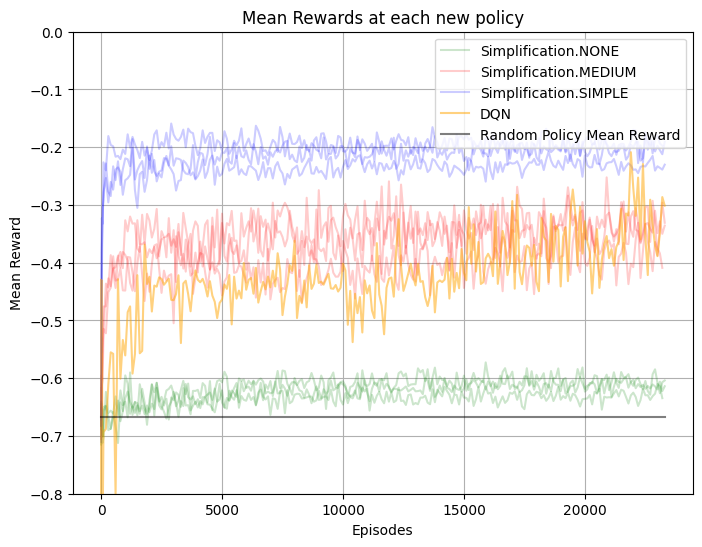

In [8]:
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']
for j,m in enumerate(model_types):
    color = colors[j]
    plt.plot(list(models[m][0].policies.keys()), mean_rewards[m][0], color=color, alpha=0.2, label=m)
    for i in range(1,3):
        plt.plot(list(models[m][i].policies.keys()), mean_rewards[m][i], color=color, alpha=0.2)
        # plt.scatter(list(models[m][i].policies.keys()), mean_rewards[m][i], color=color, alpha=0.2)

plt.plot(list(dqn_mean_rewards.keys()), dqn_mean_rewards.values(), color='orange', alpha=0.5, label="DQN")
plt.plot(list(random_rewards.keys()), list(random_rewards.values()), color='black', alpha=0.5, label="Random Policy Mean Reward")

# Add labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.title('Mean Rewards at each new policy')
# plt.xscale('log', base=2)
# plt.xscale('log', base=10)
plt.legend(loc='upper right')
plt.ylim(-0.8, 0)
plt.grid(True)

# Show the plot
plt.show()

In [9]:
# EXPLORATION IDEAS
# random noise zu policy to improve exploration / pseudo TS damit nicht immer neu policy berechnen muss.
# mode von dirichlet --> most probable MDP --> greedy sampling --> how does it explore? 
# (get policy every 100 steps and perturb at every episode to add noise)

In [10]:
# Hypothese testen: ist die Batch size das problem: TS mit verschiedenen 
# Batch sizes mit gewisser history laufen lassen und die Exploration vergleichen
# Simple model

In [11]:
#TODO plot regret instead of mean reward: mean reward - best mean reward (determined by dqn long)

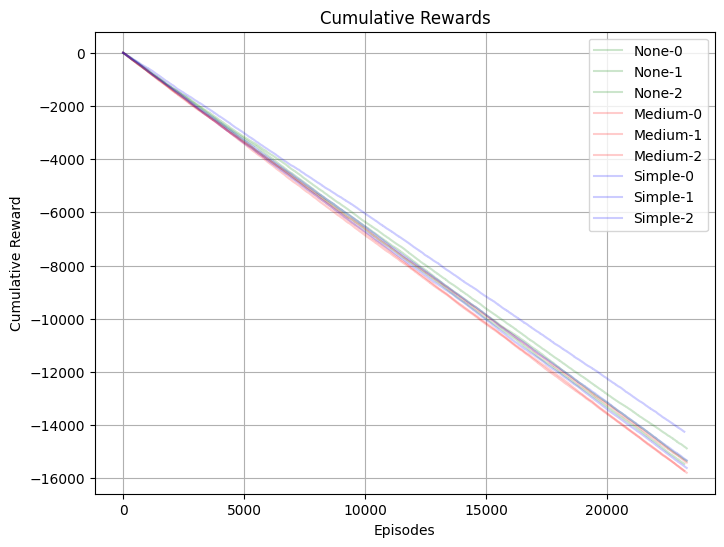

In [ ]:
plt.figure(figsize=(8, 6))
for m in model_types:
    for i in range(3):
        color = ['green', 'red', 'blue'][model_types.index(m)]
        # plt.plot(list(models[m][i].rewards.keys()), np.cumsum([models[m][i].rewards[j] for j in list(models[m][i].rewards.keys())]), label=models[m][i].name,  alpha=0.2, color=color)
        plt.plot(list(models[m][i].rewards.keys()), np.cumsum([models[m][i].rewards[j] for j in list(models[m][i].rewards.keys())]), label=models[m][i].name,  alpha=0.2, color=color)
# plt.plot(list(full.policies.keys()), dqn_rewards, label='DQN', alpha=0.2)
# Add labels, title, and legend
# plt.plot(np.cumsum([np.sum(ep.rewards) for ep in dqn.episodes[:6000]]), label='DQN', alpha=0.2, color='orange')
# plt.plot(np.cumsum([np.sum(ep.rewards) for ep in dqn.episodes]), label='DQN', alpha=1, color='black')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards')
plt.legend()
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()

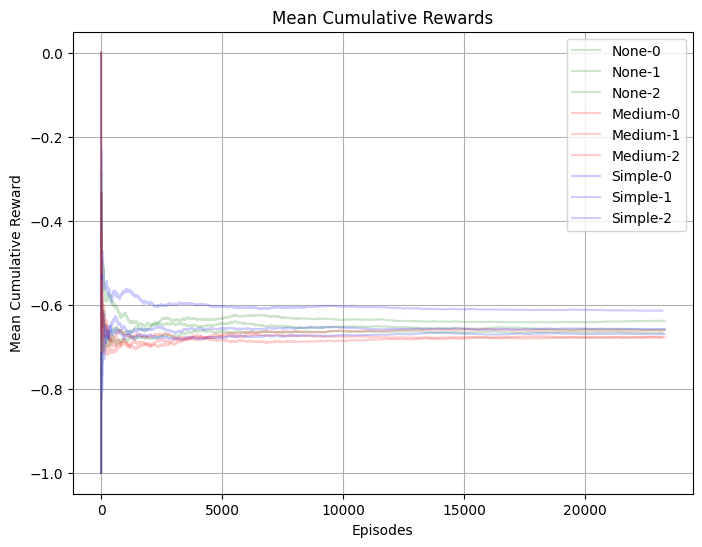

In [ ]:
plt.figure(figsize=(8, 6))
for m in model_types:
    for i in range(3):
        color = ['green', 'red', 'blue'][model_types.index(m)]
        # plt.plot(list(models[m][i].rewards.keys()), np.cumsum([models[m][i].rewards[j] for j in list(models[m][i].rewards.keys())]), label=models[m][i].name,  alpha=0.2, color=color)
        plt.plot(list(models[m][i].rewards.keys()), np.divide(np.cumsum([models[m][i].rewards[j] for j in list(models[m][i].rewards.keys())]),list(models[m][i].rewards.keys())), label=models[m][i].name,  alpha=0.2, color=color)
# plt.plot(list(full.policies.keys()), dqn_rewards, label='DQN', alpha=0.2)
# Add labels, title, and legend
# plt.plot(np.cumsum([np.sum(ep.rewards) for ep in dqn.episodes[:6000]]), label='DQN', alpha=0.2, color='orange')
# plt.plot(np.cumsum([np.sum(ep.rewards) for ep in dqn.episodes]), label='DQN', alpha=1, color='black')
plt.xlabel('Episodes')
plt.ylabel('Mean Cumulative Reward')
plt.title('Mean Cumulative Rewards')
plt.legend()
# plt.xscale('log', base=2)
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()